<a href="https://colab.research.google.com/github/prabhasg03/academic_work/blob/Deep-Learning-Lab/Task%2010/Task%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK-10
Design a Deep Learning Model to classify the movie reviews as Positive or
Negative based on the text content of reviews using IMDB dataset.
# Program

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [2]:
# Load the IMDB dataset
vocab_size = 10000 # Only keep the top 10,000 most frequent words
max_len = 200 # Pad all reviews to a length of 200 words

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
# Pad sequences to ensure they are all the same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
# Build the model
model = Sequential([
Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
LSTM(64, dropout=0.2, recurrent_dropout=0.2),
Dense(1, activation='sigmoid')
])

In [5]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',
metrics=['accuracy'])

In [6]:
model.summary()
# Train the model
history = model.fit(
x_train, y_train,
epochs=5,
batch_size=64,
validation_split=0.2,
verbose=1
)
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy:.4f}')
import matplotlib.pyplot as plt

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
313/313 [==============================] - 53s 161ms/step - loss: 0.4186 - accuracy: 0.8054 - val_loss: 0.3085 - val_accuracy: 0.8726
Epoch 2/5
313/313 [==============================] - 50s 160ms/step - loss: 0.2480 - accuracy: 0.9029 - val_loss: 0.3557 - val_accuracy: 0

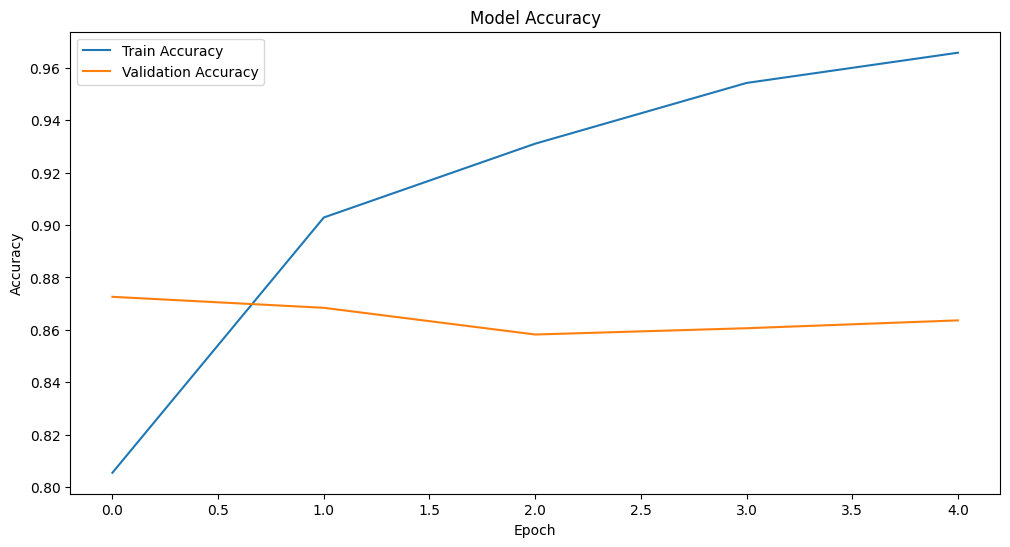

In [7]:
# Plot training &amp; validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

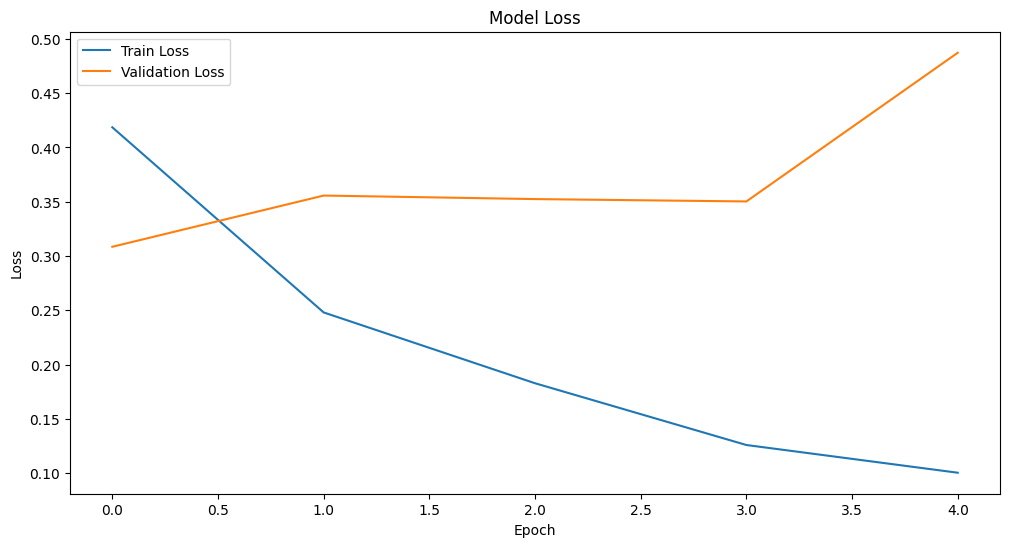

In [8]:
# Plot training &amp; validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()